### Logistic Regression

### Breast Cancer 데이터셋
#### [데이터 설명]
- 데이터: 위스콘신 유방암 진단 데이터
- 관측치 개수: 569개
- 변수 개수: 독립변수 30개 / 종속변수 1개


#### 독립변수 (세포 특징)
- radius : 반경 (중심에서 외벽까지 거리들의 평균값)
- texture : 질감 (Gray-Scale 값들의 표준편차)
- perimeter : 둘레
- area : 면적
- smoothness : 매끄러움 (반경길이의 국소적 벼노하)
- compactness : 조그만 정도 (둘레^2/면적-1)
- concavity : 오목함(윤관의 오목한 부분의 정도)
- concave points : 오목한 점의 수
- symmetry : 대칭
- fractal dimension : 프랙탈 차원 (해안선근사-1)

#### 종속변수 (양성 여부)
- malignant : 0, 악성 / Benign : 1, 양성

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc 
rc('font',family='AppleGothic')

In [3]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# 독립변수와 종속변수 분리
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
Y = pd.DataFrame(breast_cancer.target, columns=['target'])

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X.shape

(569, 30)

In [7]:
import statsmodels.api as sm

In [8]:
# intercept 추가
X = sm.add_constant(X, has_constant='add')

In [9]:
X.head()

,const,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
Y.tail()

,target
564,0
565,0
566,0
567,0
568,1


In [11]:
Y.shape

(569, 1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(398, 31) (171, 31) (398, 1) (171, 1)


In [14]:
# 로지스틱 회귀 모델 생성
logit_m = sm.Logit(Y_train, X_train)
logit_m_train = logit_m.fit(method='powell') # powell, cg, bfgs, lbfgs

/Users/zoe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/zoe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/zoe/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/zoe/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2150: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


/Users/zoe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
logit_m_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  398
Model:                          Logit   Df Residuals:                      367
Method:                           MLE   Df Model:                           30
Date:                Thu, 30 Sep 2021   Pseudo R-squ.:                  0.9327
Time:                        14:07:28   Log-Likelihood:                -17.677
converged:                      False   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 1.381e-84
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       7.7081     54.480      0.141      0.887     -99.071     114.487
mean radius                 0.7912     18.273      0.043      0.965     -35.023      36.606
mean texture                0.0261      0.487      0.054      0.957      -0.929       0.981
mean perimeter              0.1990      2.787      0.071      0.943      -5.264       5.662
mean area                   0.0004      0.085      0.005      0.996      -0.167       0.167
mean smoothness          -127.5250    211.596     -0.603      0.547    -542.245     287.195
mean compactness           76.8910    143.641      0.535      0.592    -204.639     358.421
mean concavity            -93.5032    113.479     -0.824      0.410    -315.918     128.912
mean concave points      -108.9617    187.019     -0.583      0.560    -475.511     257.588
mean symmetry             -22.6477     62.936     -0.360      0.719    -146.000     100.704
mean fractal dimension    177.7199    524.466      0.339      0.735    -850.215    1205.655
radius error               26.4757     83.270      0.318      0.751    -136.730     189.682
texture error               2.1404      3.416      0.627      0.531      -4.555       8.835
perimeter error            -0.1968      5.863     -0.034      0.973     -11.688      11.295
area error                 -0.5250      0.727     -0.722      0.470      -1.950       0.900
smoothness error         -427.0441    679.255     -0.629      0.530   -1758.359     904.271
compactness error         110.0794    327.673      0.336      0.737    -532.149     752.307
concavity error            20.3282    133.504      0.152      0.879    -241.334     281.990
concave points error      335.9700    875.071      0.384      0.701   -1379.139    2051.079
symmetry error            198.5205    391.924      0.507      0.612    -569.636     966.677
fractal dimension error   160.5365   1817.119      0.088      0.930   -3400.952    3722.025
worst radius               -0.5519      8.038     -0.069      0.945     -16.305      15.202
worst texture              -0.5303      0.470     -1.127      0.260      -1.452       0.392
worst perimeter             0.1487      0.837      0.178      0.859      -1.492       1.789
worst area                 -0.0181      0.075     -0.242      0.809      -0.165       0.129
worst smoothness           50.2341    113.484      0.443      0.658    -172.191     272.659
worst compactness         -16.2358     59.278     -0.274      0.784    -132.418      99.946
worst concavity             1.4300     23.167      0.062      0.951     -43.976      46.836
worst concave points      -48.0260    104.262     -0.461      0.645    -252.375     156.323
worst symmetry             -9.1960     56.139     -0.164      0.870    -119.226     100.834
worst fractal dimension   -54.2219    250.897     -0.216      0.829    -545.971     437.527
===========================================================================================

Possibly complete qu

In [16]:
Y_predict = logit_m_train.predict(X_test)
print(Y_predict)

61     9.999999e-01
114    9.999604e-01
489    9.558832e-01
161    9.994769e-13
128    9.961621e-01
           ...     
142    9.999985e-01
356    9.999531e-01
392    3.614221e-15
464    9.957482e-01
41     2.391947e-04
Length: 171, dtype: float64


In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [19]:
# 오차행렬(confusion matirx)를 통해 예측 성능 확인
confusion_matrix(Y_test, Y_predict)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

- 오류가 발생한다. 무엇이 문제일까? 실제 종속변수의 값(Y_test)은 0, 1로 이루어진 반면 예측된 종속변수의 값(Y_predict)은 0.97, 0.52, 0.04과 같은 0과 1에 사이의 값들로 되어있다. 즉, 각 관측대상의 예측이 확률로 되어있는 것이다.(연속형) 이를 0과 1로 판단해 나눠줘야 하는데 이 때 기준값을 주어야 하며 이를 threshold라고 한다.

In [24]:
# Y_predict를 threshold를 기준으로 0과 1로 나누어주는 함수 생성
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [25]:
Y_predict_t = cut_off(Y_predict,0.5)
Y_predict_t.head()

61     1
114    1
489    1
161    0
128    1
dtype: int64

In [26]:
# 오차행렬(confusion matirx)를 통해 예측 성능 확인
confusion_matrix(Y_test, Y_predict_t)

array([[ 62,   2],
       [  2, 105]])

In [27]:
accuracy = accuracy_score(Y_test, Y_predict_t)
precision = precision_score(Y_test, Y_predict_t)
recall = recall_score(Y_test, Y_predict_t)
f1 = f1_score(Y_test, Y_predict_t)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.977
Precision : 0.981
Recall : 0.981
F1 : 0.981


- 근데 과연 threshold를 0.5로 놓는것이 타당한가? 0~1 사이의 값의 변화를 줄때 성능이 어떻게 바뀌는지 확인해보자.

In [28]:
# 임계값에 따른 비교
def perf_eval(cm):
    # Accuracy
    Accuracy = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1, ))
    # Precision
    Precision = cm[1, 1] /sum(cm[:, 1])
    # Recall
    Recall = cm[1, 1] / sum(cm[1])
    # F1-score
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return ([Accuracy, Precision, Recall, F1])

threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'])
for i in threshold:
    Y_predict_temp = cut_off(Y_predict,i)
    confusion_matrix_temp = confusion_matrix(Y_test, Y_predict_temp)
    table.loc[i] = perf_eval(confusion_matrix_temp)
table.index.name='threshold'
table.columns.name='performance'
print(table)

performance  Accuracy  Precision    Recall        F1
threshold                                           
0.0          0.625731   0.625731  1.000000  0.769784
0.1          0.964912   0.954955  0.990654  0.972477
0.2          0.970760   0.963636  0.990654  0.976959
0.3          0.970760   0.972222  0.981308  0.976744
0.4          0.976608   0.981308  0.981308  0.981308
0.5          0.976608   0.981308  0.981308  0.981308
0.6          0.976608   0.981308  0.981308  0.981308
0.7          0.970760   0.981132  0.971963  0.976526
0.8          0.970760   0.981132  0.971963  0.976526
0.9          0.953216   0.980583  0.943925  0.961905


#### 성능평가지표 - ROC Curve & AUC

In [29]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [30]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print('Train Accuracy: %s ' %acc_train)
    print('Train AUC: %s ' %auc_train)
    print('Train Confusion Matrix:')
    print(cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print('Test Accuracy: %s ' %acc_test)
    print('Test AUC: %s ' %auc_test)
    print('Test Confusion Matrix:')
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()

    return best_threshold

Train Accuracy: 0.9849246231155779 
Train AUC: 0.9838648648648649 
Train Confusion Matrix:
[[145   3]
 [  3 247]]
Test Accuracy: 0.9707602339181286 
Test AUC: 0.970356308411215 
Test Confusion Matrix:
[[ 62   2]
 [  3 104]]


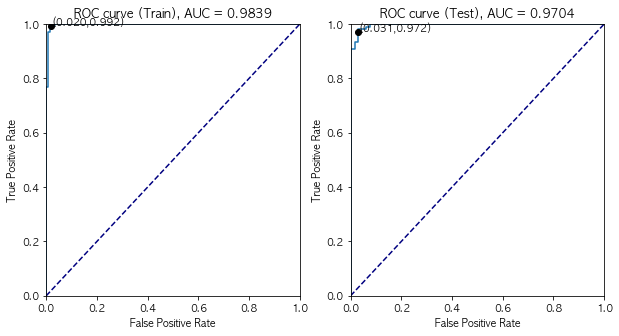

Best Threshold: 0.6238656746536151


In [31]:
best_threshold = plot_ROC(y_train_true=Y_train, y_train_prob=logit_m_train.predict(X_train), 
                          y_test_true=Y_test, y_test_prob=logit_m_train.predict(X_test))
print('Best Threshold:', best_threshold)

- 그렇다면 로지스틱과 KNN을 비교하면 어떤 방법이 성능이 더 좋을까?